
# Implement Linear Regression Algorithm on the given dataset

Linear Regression is a supervised machine learning algorithm where the predicted output is con-
tinuous. In this lab we will implement the Linear Regression algorithm in Python using Pytorch

library. PyTorch is an open source machine learning library based on Torch library which is used
for scientific computation. Pytorch tutorials for practice and documentation is available in the
following link https://pytorch.org/docs/stable/index.html.

2.0.1 Univariate Linear Regression
Simple linear regression uses traditional slope-intercept form, where θ0 and θ1 are the parameters
our algorithm will try to "learn" to produce the most accurate predictions. x represents our input
data and y represents our prediction.

y = θ0 + θ1x

2.0.2 Multiple Variable Linear Regression

A more complex, multi-variable linear equation might look like this, where θ represents the coef-***bold text***
ficients, our model will try to learn.

y = θ
TX = θ0 + θ1x1 + θ2x2 + θ3x3 + . . . + θnxn

The variables x1, x2, x3 . . . xn represent the independent variables in our dataset. θ0 represents
intercept to y-axis or the bias term. For crop yeild prediction of apples these independent variables
might include temperature, rainfall and humidity.

**y = θ0 + θ1 temperature + θ2 rainfall + θ3 humidity**


In this lab we’ll create a model that predicts crop yeilds for apples (target variable) by looking at
the average temperature, rainfall and humidity (input variables or features) in different regions.

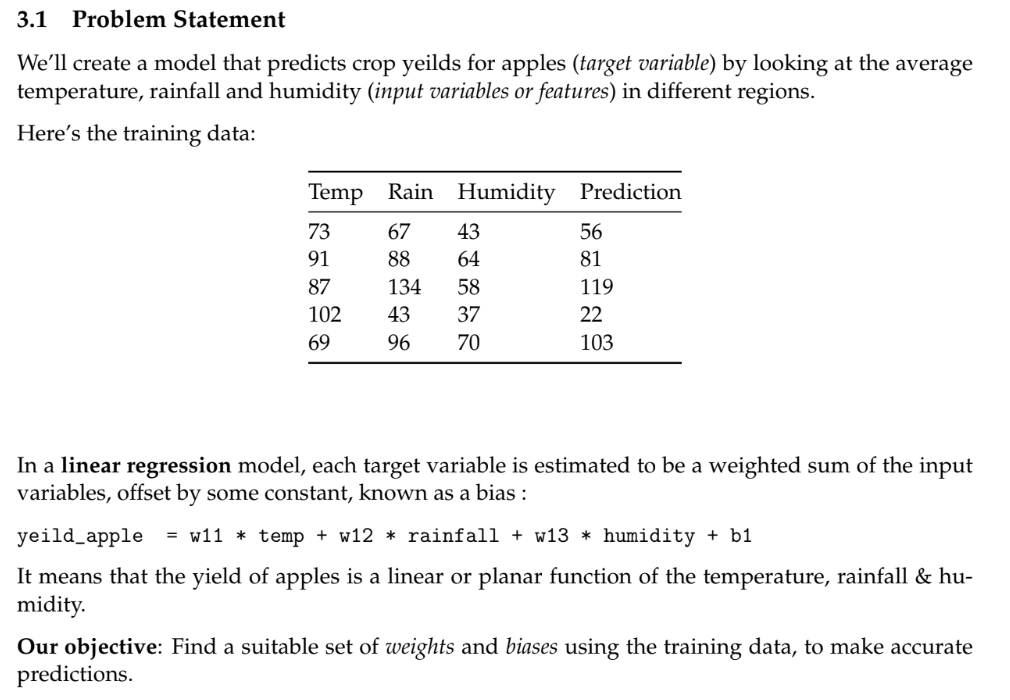

# Linear regression model from scratch

In [170]:
# Import Numpy & PyTorch
import numpy as np
import torch
from torch.utils.data import TensorDataset

In [171]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],
[102, 43, 37],
[69, 96, 70]], dtype='float32')
inputs


array([[ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.]], dtype=float32)

In [172]:
# Target (apples)
targets = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')
targets

array([[ 56.],
       [ 81.],
       [119.],
       [ 22.],
       [103.]], dtype=float32)

In [173]:
#Before we build a model, we need to convert inputs and targets to PyTorch tensors.
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
print(inputs)

targets = torch.from_numpy(targets)
print(targets)

dataset = TensorDataset(inputs,targets)
dataset[ :4] #here 4 represents the number of dataset(row)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.]]), tensor([[ 56.],
         [ 81.],
         [119.],
         [ 22.]]))

batch_size: This argument sets the number of samples in each batch of data. The DataLoader will divide the dataset into batches of size batch_size, and each batch will be processed separately during training. Setting a larger batch size can improve training speed by allowing the model to process more samples in parallel, but it may require more memory.

shuffle: This argument determines whether the samples in the dataset should be shuffled before they are divided into batches. Setting shuffle=True will randomize the order of the samples in the dataset before they are divided into batches, which can help prevent the model from overfitting to the order of the training data.

In [174]:
# creating dataloader of specific batch size
from torch.utils.data import DataLoader

batch_size = 5
train_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [175]:
# access the dataloader
for input, target in train_loader:
  print(input)
  print(target)
  break

tensor([[ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]])
tensor([[103.],
        [ 56.],
        [ 22.],
        [ 81.],
        [119.]])


In [176]:
#This line creates a tensor called weights with shape (1, 3). The tensor is filled with random values drawn from a normal distribution. 
#The requires_grad=True argument tells PyTorch to track the gradients of this tensor during backpropagation, which means we can compute gradients with 
#respect to weights during training.
weights = torch.randn(1,3, requires_grad=True)


#This line creates a tensor called bias with shape (1,). The tensor is filled with random values drawn from a normal distribution. Like weights, 
# nthe requires_grad=True argument tells PyTorch to track the gradients of this tensor during backpropagation.
bias = torch.randn(1, requires_grad = True)
print(weights)
print(bias)

#here weight is weight to each feature value and bias is theta 0

tensor([[-0.1775, -1.2955,  1.1166]], requires_grad=True)
tensor([1.1948], requires_grad=True)


In [177]:
# defining the modelThis is a function definition for a linear regression model. 
'''The @ symbol is the matrix multiplication operator in Python.
The input X is a tensor representing the input features. weights is also a tensor containing the learned weights (or coefficients) 
for each feature, and bias is a scalar value representing the learned intercept term.
The function computes the dot product of X and weights, transposes the resulting tensor, adds the bias term, and returns the final result. 
This is the predicted output of the linear regression model given the input features X.'''


def model(X):
  return X @ weights.t() + bias

for x,y in train_loader:
  preds = model(x)
  print("Predictions is :n", preds)
  print("Actual targets is :n", y)

Predictions is :n tensor([[ -57.2585],
        [ -31.2997],
        [ -57.4981],
        [ -50.5465],
        [-123.0828]], grad_fn=<AddBackward0>)
Actual targets is :n tensor([[103.],
        [ 22.],
        [ 81.],
        [ 56.],
        [119.]])


# Loss Function

In [178]:
diff = preds - targets
#diff0.numel() represents the total number of elements in diff0.
torch.sum(diff*diff)/diff.numel()


tensor(22593.3457, grad_fn=<DivBackward0>)

In [179]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

loss = mse(preds, targets)
print(loss)
     

tensor(22593.3457, grad_fn=<DivBackward0>)


# Compute Gradients

In [180]:
'''With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the
weights and biases, because they have requires_grad set to True.'''
loss.backward()
print(weights.grad)
print(bias.grad)

tensor([[-24118.3340, -26555.6992, -15844.5459]])
tensor([-280.2742])


# Train the model using gradient descent

This code block updates the values of the weights and biases based on the gradients of the loss with respect to them.

torch.no_grad() creates a context where autograd is disabled. This is because we don't want to update the gradients of the weights and biases during this step.

weight -= weight.grad * 1e-5 subtracts the product of the learning rate and the gradient of the weights from the weights tensor.

bias -= bias.grad * 1e-5 subtracts the product of the learning rate and the gradient of the biases from the biases tensor.

weight.grad.zero_() and bias.grad.zero_() reset the gradients of the weights and biases to zero. This is because PyTorch accumulates gradients by default (i.e., the newly computed gradients are added to the existing gradients). So, we need to reset the gradients to zero before computing the gradients in the next step.

In [181]:
with torch.no_grad():
    weights -= weights.grad * 1e-5
    bias -= bias.grad * 1e-5
    weights.grad.zero_()
    bias.grad.zero_() 

In [182]:
prediction = model(inputs)
loss = mse(prediction, targets)
print(loss)

tensor(10741.8271, grad_fn=<DivBackward0>)


In [183]:
for i in range(1000):
    prediction = model(inputs)
    loss = mse(prediction, targets)
    loss.backward()
    with torch.no_grad():
        weights -= weights.grad * 1e-5
        bias -= bias.grad * 1e-5
        weights.grad.zero_()
        bias.grad.zero_()

In [184]:
prediction = model(inputs)
loss = mse(prediction, targets)
print('loss',loss)
print('prediction',prediction)
print('weights',weights)
print('bias',bias)



loss tensor(3.7656, grad_fn=<DivBackward0>)
prediction tensor([[ 57.2251],
        [ 83.2513],
        [116.2252],
        [ 20.3745],
        [104.3845]], grad_fn=<AddBackward0>)
weights tensor([[-0.4466,  0.7869,  0.8353]], requires_grad=True)
bias tensor([1.1900], requires_grad=True)


In [185]:
'''Use the model to predict crop yield for apples if temperature is 70, Rain is 34 and Humidity
is 45.'''
inputs = np.array([70, 34, 45], dtype='float32')
inputs = torch.from_numpy(inputs)
prediction = model(inputs)
print('prediction: ', prediction)

prediction:  tensor([34.2668], grad_fn=<AddBackward0>)
